# ĐỒ ÁN CUỐI KỲ: Phân tích tỉ lệ rời bỏ của khách hàng trong BankChurners Dataset
Môn học: CSC17104 – Lập trình cho Khoa học Dữ liệu

Khoa: Công nghệ Thông tin - ĐH KHTN, ĐHQG-HCM

Nhóm 26:
Sinh viên thực hiện:
- 23122035 - Châu Văn Minh Khoa
- 23122046 - Phan Ngọc Quân 

### Quy trình thực hiện
1. Thu thập dữ liệu
2. Khám phá dữ liệu
3. Nhận xét tổng quan về dữ liệu
4. Đặt câu hỏi Insights
5. Phân tích dữ liệu và trả lời câu hỏi
6. Kết luận
7. Self-reflection

## I. DATA COLLECTION

### Dữ liệu của bạn là về chủ đề gì?


- Ngành ngân hàng chịu áp lực lớn trong việc giữ chân khách hàng thẻ tín dụng; nếu khách đóng tài khoản thì doanh thu từ phí và lãi giảm đáng kể.


- Bộ dữ liệu BankChurners ghi nhận hồ sơ khách hàng cá nhân, thói quen sử dụng thẻ, tương tác dịch vụ và trạng thái rời bỏ (`Attrition_Flag`) để đo lường khả năng ở lại hay rời đi của khách hàng.

### Nguồn dữ liệu
- Nguồn: Kaggle – Credit Card Customers (tệp `BankChurners.csv`, https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers).
- Public date(Kaggle): December 1, 2024

### Quyền sử dụng
- License: CC0-Public Domain, được chia sẻ cho mục đích học tập và nghiên cứu.


- Mục đích sử dụng: phục vụ môn học, tuân thủ điều khoản Kaggle; dữ liệu đã được ẩn danh nhưng vẫn cần tránh suy diễn định danh cá nhân cụ thể.


- Lưu ý đạo đức: các biến tài chính nên được diễn giải có trách nhiệm, không gán nhãn tiêu cực cho nhóm khách hàng cụ thể; khi chia sẻ kết quả cần nêu rõ đây là dữ liệu giả lập/ẩn danh.

### Người ta thu thập dữ liệu như thế nào?
Các bước thực hiện:
- Đăng nhập vào website https://leaps.analyttica.com/home.
- Click on the 'Apply' tab trên góc trên bên trái
- Ở đây, ta có thể tìm thấy nhiều vấn đề của các doanh nghiệp để giải quyết cùng với bộ dataset từ họ.

Ở trên là các bước thực hiện được ghi trên kaggle. Tuy nhiên, do bộ dữ liệu đã khá cũ nên cách trên hiện nay không hoạt động được. Nhóm em có check thử thì thấy trang web đã thay đổi tên miền.

### Mục đích lựa chọn dữ liệu này

- Dataset có đủ dữ liệu để phân tích (10127 dòng, 23 cột) đa dạng biến về nhân khẩu học, lịch sử giao dịch, mức độ tương tác; phù hợp để luyện quy trình EDA, tiền xử lý và xây dựng mô hình phân loại churn.
- Có cả dữ liệu numerical và categorical nên có thể áp dụng nhiều kỹ thuật phân tích
- Dữ liệu thực tế từ người dùng nên có ý nghĩa thực tế
- Bối cảnh ngân hàng quen thuộc với các bài toán khoa học dữ liệu hướng kinh doanh, thuận tiện để trình bày insight định lượng và gợi ý chiến lược.

### Mô tả dữ liệu


- Mỗi dòng: Một khách hàng thẻ tín dụng với trạng thái tiếp tục hay rời bỏ, kèm các đặc trưng nhân khẩu học và hành vi sử dụng thẻ.


- Các nhóm biến chính:


  - Numerical: `Customer_Age`, `Months_on_book`, `Credit_Limit`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Avg_Utilization_Ratio`,...


  - Categorical: `Gender`, `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category`.


- Mục tiêu phân tích: khám phá phân bố, xác định đặc trưng quan trọng ảnh hưởng churn, chuẩn bị cho mô hình dự báo `Attrition_Flag`.


- Thách thức: lớp churn chiếm tỷ lệ nhỏ (~16%), cần lưu ý khi xây dựng mô hình và đánh giá hiệu năng.




-> Tóm lại, đây là bộ dữ liệu thực hành kinh điển cho bài toán churn trong lĩnh vực ngân hàng/thẻ tín dụng, thích hợp để minh họa pipeline EDA → tiền xử lý → mô hình phân loại và các khuyến nghị giữ chân khách hàng.

## II. DATA EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Dataset overview

#### Basic Information

##### Đọc dữ liệu

In [2]:
data_path = "data/BankChurners.csv"
df = pd.read_csv(data_path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


##### Số dòng và cột

In [3]:
rows, cols = df.shape
print(f"Số dòng: {rows}, Số cột: {cols}")

Số dòng: 10127, Số cột: 23


- Như vậy data có số dòng là 10.127 và số cột là 23.

##### Các dòng dữ liệu
Mỗi dòng có ý nghĩa gì? Có dòng nào có ý nghĩa khác với các dòng còn lại không?

In [4]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
2507,716400633,Existing Customer,33,M,3,High School,Single,$40K - $60K,Blue,24,...,5156.0,1427,3729.0,0.480,2057,54,0.421,0.277,0.000305,0.99969
10046,715769958,Existing Customer,53,F,3,Unknown,Married,$40K - $60K,Blue,39,...,4855.0,1912,2943.0,0.606,14969,104,0.763,0.394,0.000130,0.99987
682,710706558,Existing Customer,51,F,4,Graduate,Single,Less than $40K,Blue,42,...,2680.0,1753,927.0,0.320,1154,33,0.571,0.654,0.000097,0.99990
318,773373108,Existing Customer,49,F,4,High School,Married,Less than $40K,Blue,43,...,2826.0,2070,756.0,0.541,1025,28,0.647,0.732,0.000043,0.99996
2742,718934058,Existing Customer,36,M,2,Doctorate,Single,$40K - $60K,Blue,26,...,2845.0,2517,328.0,0.686,2396,51,0.500,0.885,0.000260,0.99974
1672,811005858,Existing Customer,33,F,0,Unknown,Married,Less than $40K,Blue,28,...,1438.3,0,1438.3,0.916,2914,70,0.591,0.000,0.000308,0.99969
7697,715236783,Existing Customer,42,F,4,College,Divorced,$40K - $60K,Blue,36,...,3734.0,2517,1217.0,0.724,4792,87,0.740,0.674,0.000183,0.99982
8894,712351908,Existing Customer,45,M,3,High School,Unknown,$80K - $120K,Blue,34,...,26438.0,1655,24783.0,0.920,8029,81,0.723,0.063,0.000193,0.99981
1441,712489158,Existing Customer,36,F,0,Uneducated,Single,Unknown,Blue,18,...,3667.0,948,2719.0,0.641,2781,59,0.844,0.259,0.000159,0.99984
2281,714062958,Existing Customer,36,M,4,Unknown,Single,$40K - $60K,Blue,36,...,9887.0,994,8893.0,0.488,2552,64,0.455,0.101,0.000063,0.99994


- Mỗi dòng tương ứng một khách hàng thẻ tín dụng, có vẻ không có dòng nào khác biệt bất thường.

##### Overall size

In [5]:
size_mb = os.path.getsize("data/BankChurners.csv") / (1024**2)
print(f"Dataset size: {size_mb:.2f} MB")

Dataset size: 1.45 MB


#### Data Integrity

##### Kiểm tra trùng lặp

In [6]:
# Kiểm tra trùng lặp hoàn toàn
duplicate_count = df.duplicated().sum()
print(f"Số dòng trùng lặp hoàn toàn: {duplicate_count}")
df[df.duplicated()]

Số dòng trùng lặp hoàn toàn: 0


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


- Không có dòng nào bị trùng hoàn toàn cả.

##### Kiểm tra có dòng nào "empty" hoàn toàn không

In [7]:
empty_rows = df.isna().all(axis=1).sum()
print("Số dòng hoàn toàn trống:", empty_rows)

Số dòng hoàn toàn trống: 0


- Không có dòng nào hoàn toàn empty cả

#### Column Inventory

##### Ý nghĩa các cột

In [8]:
list(df.columns.values)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

| Cột | Ý nghĩa |
|---|---|
| CLIENTNUM | Định danh nội bộ của khách hàng trong hệ thống thẻ tín dụng. |
| Attrition_Flag | Trạng thái khách hàng: `Attrited Customer` (đã đóng) hoặc `Existing Customer` (còn hoạt động). |
| Customer_Age | Tuổi của khách hàng. |
| Gender | Giới tính (`M`/`F`). |
| Dependent_count | Số người phụ thuộc trong hộ gia đình. |
| Education_Level | Trình độ học vấn (High School, Graduate, Doctorate, Unknown,...). |
| Marital_Status | Tình trạng hôn nhân (Married, Single, Divorced,...). |
| Income_Category | Nhóm thu nhập hằng năm (ví dụ: `< $40K`, `$60K - $80K`). |
| Card_Category | Hạng thẻ tín dụng (Blue, Silver, Gold, Platinum). |
| Months_on_book | Số tháng khách hàng đã gắn bó với ngân hàng (tuổi thẻ). |
| Total_Relationship_Count | Tổng số sản phẩm tài chính khách hàng sở hữu. |
| Months_Inactive_12_mon | Số tháng không hoạt động trong 12 tháng gần nhất. |
| Contacts_Count_12_mon | Số lần nhân viên liên hệ khách trong 12 tháng gần nhất. |
| Credit_Limit | Hạn mức tín dụng hiện tại. |
| Total_Revolving_Bal | Số dư quay vòng (revolving balance) trên thẻ. |
| Avg_Open_To_Buy | Hạn mức còn lại trung bình (Credit_Limit - Total_Revolving_Bal). |
| Total_Amt_Chng_Q4_Q1 | Mức thay đổi tổng giá trị giao dịch giữa quý 4 và quý 1. |
| Total_Trans_Amt | Tổng giá trị giao dịch thẻ trong 12 tháng gần nhất. |
| Total_Trans_Ct | Tổng số lượng giao dịch thẻ trong 12 tháng gần nhất. |
| Total_Ct_Chng_Q4_Q1 | Mức thay đổi số lượng giao dịch giữa quý 4 và quý 1. |
| Avg_Utilization_Ratio | Tỷ lệ sử dụng tín dụng trung bình (Total_Revolving_Bal / Credit_Limit). |
| Naive_Bayes_Classifier_..._Education_Level_Months_Inactive_12_mon_1 | Xác suất từ mô hình Naive Bayes nội bộ (thành phần 1) hỗ trợ phân loại churn. |
| Naive_Bayes_Classifier_..._Education_Level_Months_Inactive_12_mon_2 | Xác suất từ mô hình Naive Bayes nội bộ (thành phần 2) bổ sung cho biến trên. |

##### Những cột có tiềm năng để phân tích chuyên sâu
Các cột về đặc tính tài khoản (Account / Relationship)

- Months_on_book

- Total_Relationship_Count

- Card_Category

- Credit_Limit

- Avg_Open_To_Buy

- Avg_Utilization_Ratio

##### Drop Columns
- Xóa cột "CLIENTNUM" vì cột này không mang thông tin để phân tích
- Xóa 2 cột cuối cùng "Naive_Bayes_Classifier..." vì 2 cột này không phải dữ liệu thực tế, được khuyến cáo nên xóa trên kaggle

In [9]:
df = df.drop(columns=['CLIENTNUM'])
df = df.drop(columns=df.columns[-2:])

#### Data Types

##### Kiểu dữ liệu của từng cột

In [10]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

##### Có cột nào có kiểu dữ liệu không thích hợp không?
- Nhìn chung thì các cột đều có dữ liệu phù hợp

##### Các cột cần convert data type
- Các cột đều có kiểu dữ liệu phù hợp nên không cột nào cần convert

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

- Như vậy các cột dữ liệu đã ổn để tiếp tục.

### Numerical Columns Analysis

Trước hết, ta cần filter các cột numerical

In [12]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#### Phân phối dữ liệu và khuynh hướng trung tâm    

##### Hình dạng phân phối

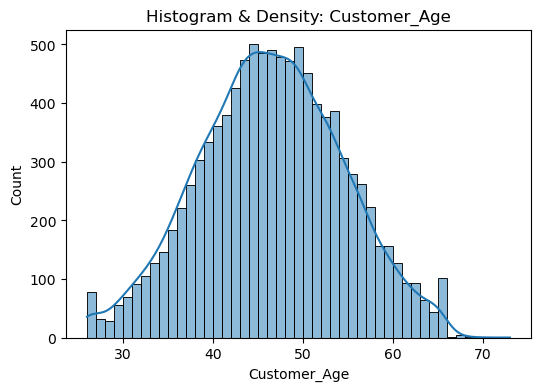


Column: Customer_Age
Độ lệch: -0.033605016317173456
Dữ liệu cân bằng


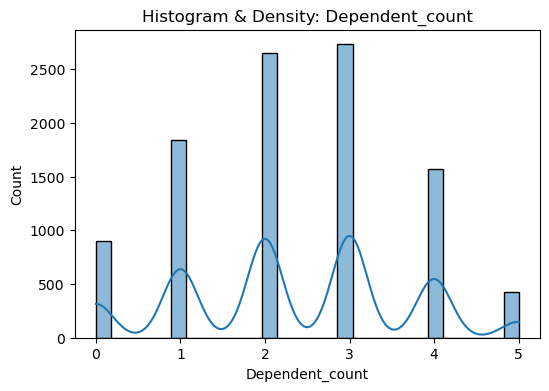


Column: Dependent_count
Độ lệch: -0.020825535616339912
Dữ liệu cân bằng


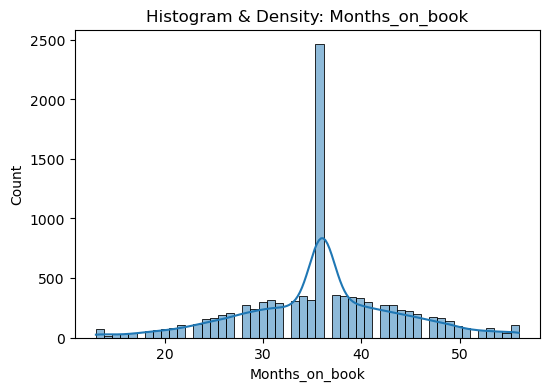


Column: Months_on_book
Độ lệch: -0.10656535989402989
Dữ liệu cân bằng


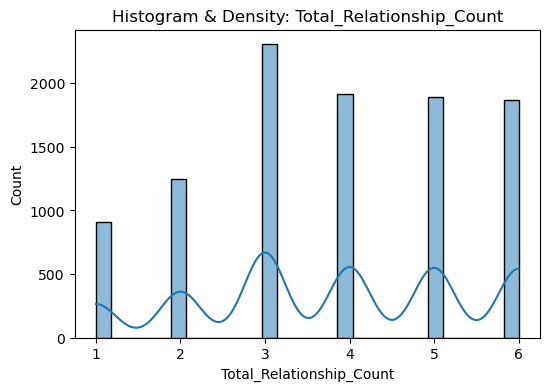


Column: Total_Relationship_Count
Độ lệch: -0.16245241498173682
Dữ liệu cân bằng


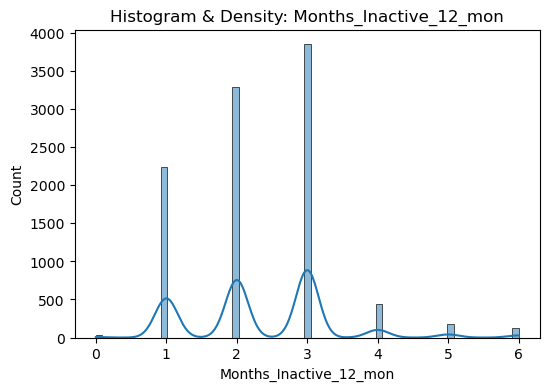


Column: Months_Inactive_12_mon
Độ lệch: 0.6330611289713137
Dữ liệu lệch phải



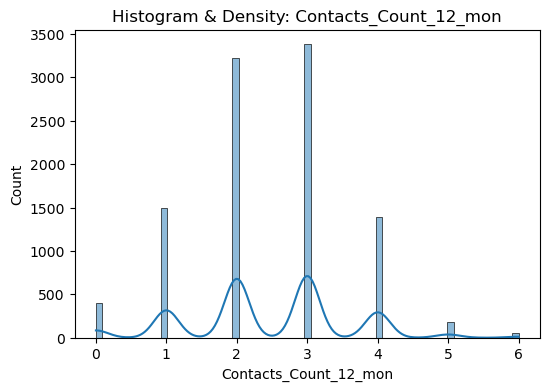


Column: Contacts_Count_12_mon
Độ lệch: 0.011005626218976492
Dữ liệu cân bằng


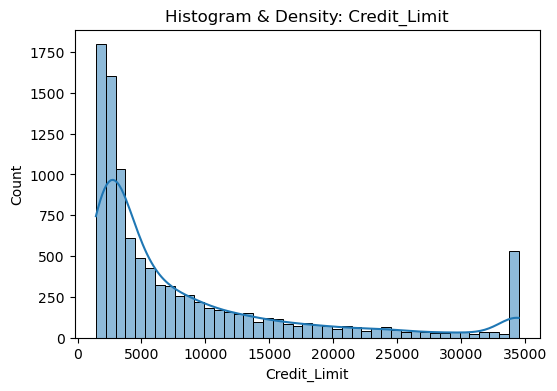


Column: Credit_Limit
Độ lệch: 1.666725807993647
Dữ liệu lệch phải



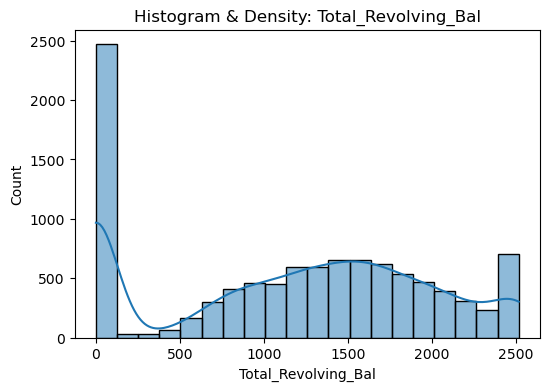


Column: Total_Revolving_Bal
Độ lệch: -0.14883725028007228
Dữ liệu cân bằng


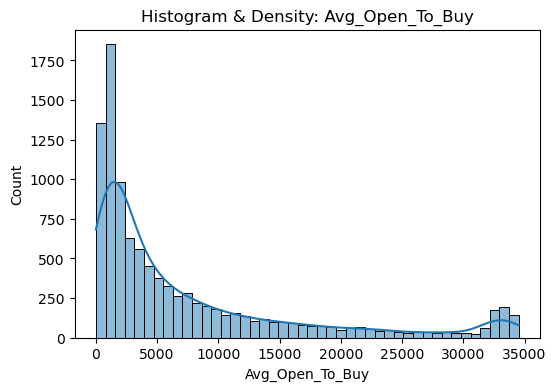


Column: Avg_Open_To_Buy
Độ lệch: 1.6616965459311595
Dữ liệu lệch phải



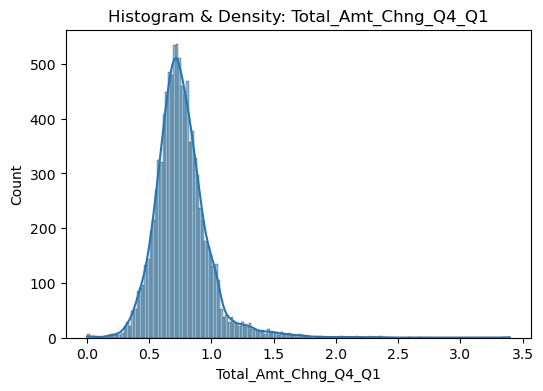


Column: Total_Amt_Chng_Q4_Q1
Độ lệch: 1.7320634114286038
Dữ liệu lệch phải



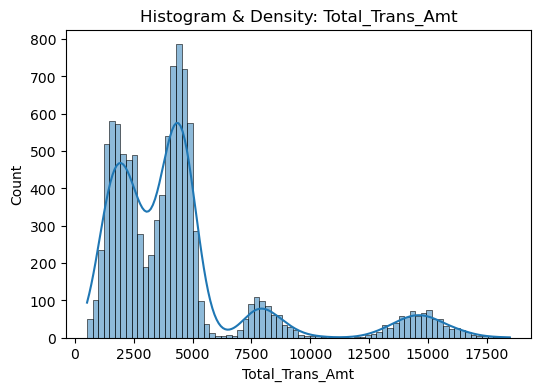


Column: Total_Trans_Amt
Độ lệch: 2.0410034025756936
Dữ liệu lệch phải



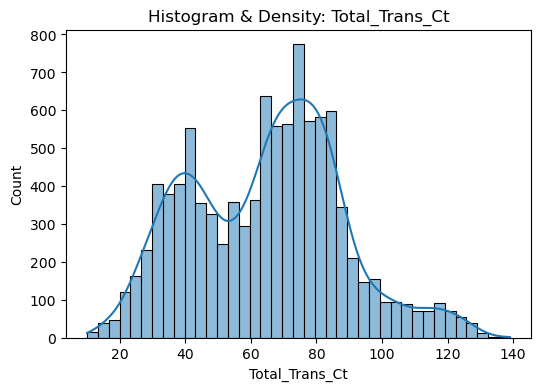


Column: Total_Trans_Ct
Độ lệch: 0.15367306849872275
Dữ liệu cân bằng


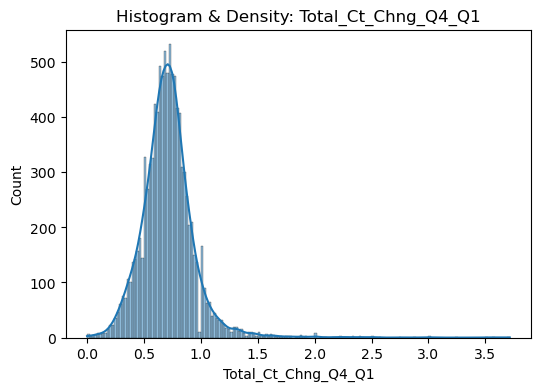


Column: Total_Ct_Chng_Q4_Q1
Độ lệch: 2.0640305679077477
Dữ liệu lệch phải



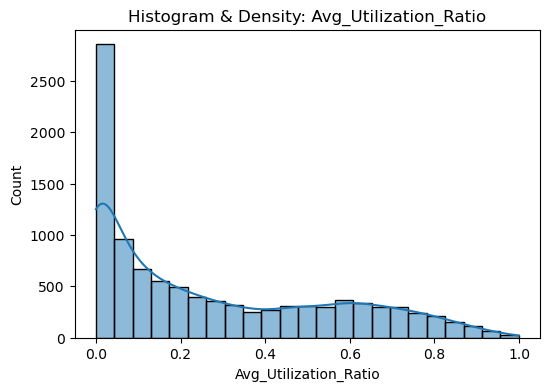


Column: Avg_Utilization_Ratio
Độ lệch: 0.7180079967731994
Dữ liệu lệch phải



In [13]:
skewness = df[numerical_cols].skew()
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram & Density: {col}")
    plt.show()

    print(f"\nColumn: {col}")
    print(f"Độ lệch: {skewness[col]}")

    if skewness[col] > 0.5:
        print("Dữ liệu lệch phải\n")
    elif skewness[col] < -0.5:
        print("Dữ liệu lệch trái\n")
    else:
        print("Dữ liệu cân bằng")


- Có nhiều biến như Customer_Age hay Dependent_count có phân phối gần chuẩn, tức là khá đối xứng và ổn định. 

- Trong khi một số biến tài chính như Credit_Limit, Total_Trans_Amt và Avg_Utilization_Ratio bị lệch phải, nghĩa là phần lớn khách hàng có giá trị thấp, chỉ một nhóm nhỏ có giá trị rất cao. 

- Điều này có thể cho chúng ta gợi ý rằng hành vi chi tiêu và sử dụng thẻ của khách hàng không đồng đều và có thể sử dụng yếu tố này để dự đoán nguy cơ rời bỏ.

#### Range & Outliers
Ở phần này, với các cột có kiểu dữ liệu số để hiểu thêm về dữ liệu, ta sẽ tính:
- Số các giá trị thiếu
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị mean
- Giá trị min
- Giá trị median
- Giá trị std
- Giá trị max

In [14]:
num_summary_rows = []
for col in numerical_cols:
    s = df[col]
    mean_val = s.mean()
    std_val = s.std()
    min_val = s.min()
    q1 = s.quantile(0.25)
    median_val = s.median()
    q3 = s.quantile(0.75)
    max_val = s.max()
    num_summary_rows.append({
        'column': col,
        'mean': mean_val,
        'std': std_val,
        'min': min_val,
        'q1': q1,
        'median': median_val,
        'q3': q3,
        'max': max_val
    })
num_summary_df = pd.DataFrame(num_summary_rows)
num_summary_df

,column,mean,std,min,q1,median,q3,max
0,Customer_Age,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
1,Dependent_count,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
2,Months_on_book,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
3,Total_Relationship_Count,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
4,Months_Inactive_12_mon,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
5,Contacts_Count_12_mon,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
6,Credit_Limit,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
7,Total_Revolving_Bal,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
8,Avg_Open_To_Buy,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
9,Total_Amt_Chng_Q4_Q1,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


##### Outliers Detection
Chúng ta tiến hành kiểm tra xem các cột dữ liệu số có xuất hiện giá trị ngoại lai (outliers) hay không bằng kỹ thuật IQR outlier detection.

In [15]:
outlier_rows = []
outliers = []
for col in numerical_cols:
    s = df[col].dropna()
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < lower) | (s > upper)
    outliers.append(s[mask].values)
    outlier_rows.append({"column": col, "outliers": mask.sum(), "percent": round(mask.sum()/len(s)*100,2)})
pd.DataFrame(outlier_rows)

,column,outliers,percent
0,Customer_Age,2,0.02
1,Dependent_count,0,0.00
2,Months_on_book,386,3.81
3,Total_Relationship_Count,0,0.00
4,Months_Inactive_12_mon,331,3.27
5,Contacts_Count_12_mon,629,6.21
6,Credit_Limit,984,9.72
7,Total_Revolving_Bal,0,0.00
8,Avg_Open_To_Buy,963,9.51
9,Total_Amt_Chng_Q4_Q1,396,3.91


##### Kiểm tra outliers

In [16]:
outlier_rows = []

for i in range(len(numerical_cols)):
    print(f"Outliers in {numerical_cols[i]}: {outliers[i][:10]}")


Outliers in Customer_Age: [73 70]
Outliers in Dependent_count: []
Outliers in Months_on_book: [54 56 56 56 54 56 56 56 54 55]
Outliers in Total_Relationship_Count: []
Outliers in Months_Inactive_12_mon: [6 0 5 0 6 5 5 5 6 5]
Outliers in Contacts_Count_12_mon: [0 0 0 0 0 0 0 0 0 0]
Outliers in Credit_Limit: [34516. 29081. 30367. 32426. 34516. 34516. 23957. 34516. 25300. 34516.]
Outliers in Total_Revolving_Bal: []
Outliers in Avg_Open_To_Buy: [32252. 27685. 28005. 31848. 34516. 34516. 33001. 23970. 32753. 27005.]
Outliers in Total_Amt_Chng_Q4_Q1: [1.335 1.541 2.594 1.405 2.175 1.376 1.975 2.204 3.355 1.524]
Outliers in Total_Trans_Amt: [8693 8947 8854 8796 8778 8644 9331 8987 8780 8753]
Outliers in Total_Trans_Ct: [139 138]
Outliers in Total_Ct_Chng_Q4_Q1: [1.625 3.714 2.333 2.333 2.5   1.182 1.364 3.25  2.    1.7  ]
Outliers in Avg_Utilization_Ratio: []


- Nhận xét: Các giá trị outliers được in ra hoàn toàn có thể xảy ra, không quá bất thường nên các outliers này là "genuine extreme values"

#### Data Quality

In [17]:
missing_summary_rows = []
for col in numerical_cols:
    s = df[col]
    missing = s.isna().sum()
    missing_pct = round(missing/len(s)*100,2)
    missing_summary_rows.append({
        'column': col,
        'missing': missing,
        'missing_%': missing_pct
    })
missing_summary_df = pd.DataFrame(missing_summary_rows)
missing_summary_df

,column,missing,missing_%
0,Customer_Age,0,0.0
1,Dependent_count,0,0.0
2,Months_on_book,0,0.0
3,Total_Relationship_Count,0,0.0
4,Months_Inactive_12_mon,0,0.0
5,Contacts_Count_12_mon,0,0.0
6,Credit_Limit,0,0.0
7,Total_Revolving_Bal,0,0.0
8,Avg_Open_To_Buy,0,0.0
9,Total_Amt_Chng_Q4_Q1,0,0.0


Nhận xét: Tất cả các cột đều đây đủ, không chứa missing values nào. Lý giải một chút, một số tổ chức ngân hàng có quy trình ETL chuẩn:

- Missing được xử lý trước khi release dataset

- Các trường bắt buộc đã có giá trị mặc định

Vậy nên dataset này không chứa missing values nào thì cũng là điều dễ hiểu

### Categorical Columns Analysis

Tương tự như numerical columns, ta cũng lọc các cột categorical

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

#### Value Distribution

##### Unique values

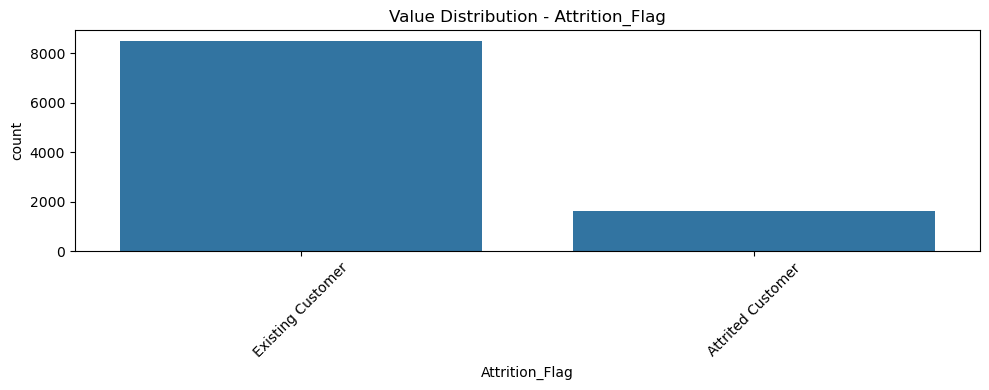


Column: Attrition_Flag
Unique values: 2
Top values:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Dữ liệu không cân bằng



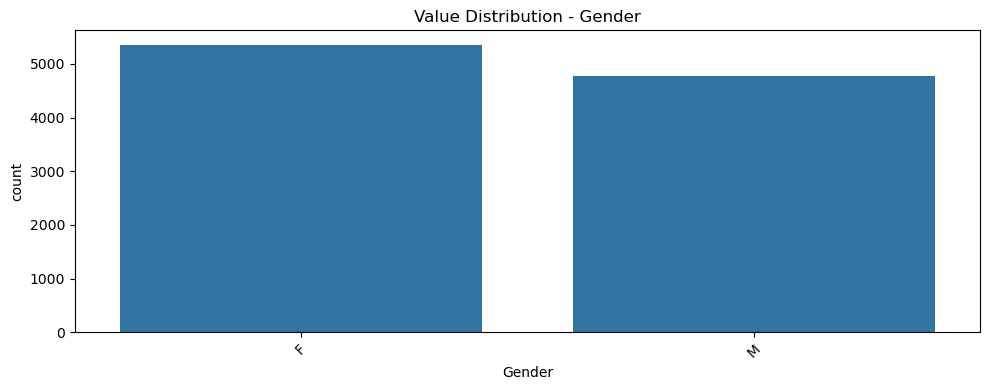


Column: Gender
Unique values: 2
Top values:
Gender
F    5358
M    4769
Name: count, dtype: int64
Dữ liệu cân bằng



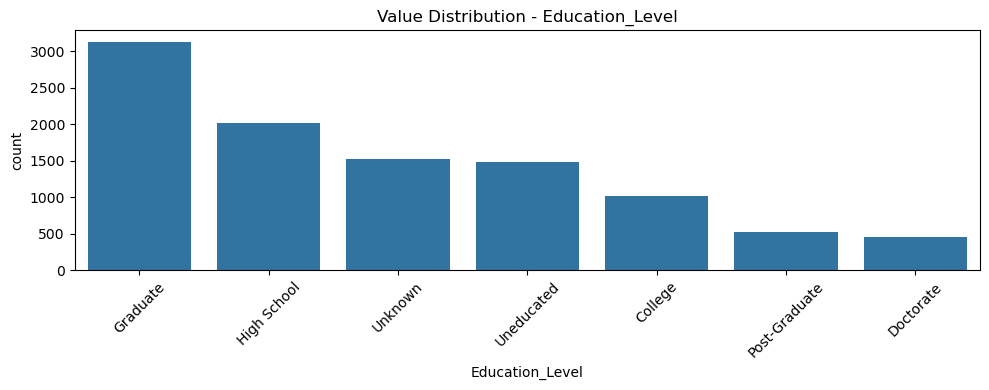


Column: Education_Level
Unique values: 7
Top values:
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Dữ liệu cân bằng



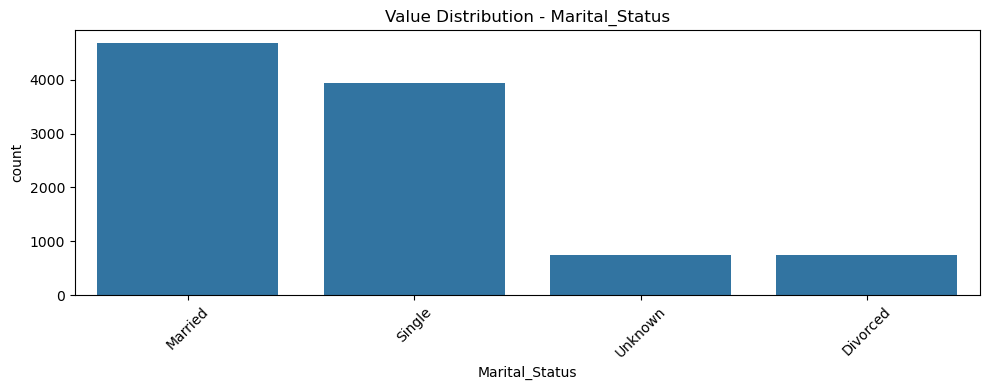


Column: Marital_Status
Unique values: 4
Top values:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Dữ liệu cân bằng



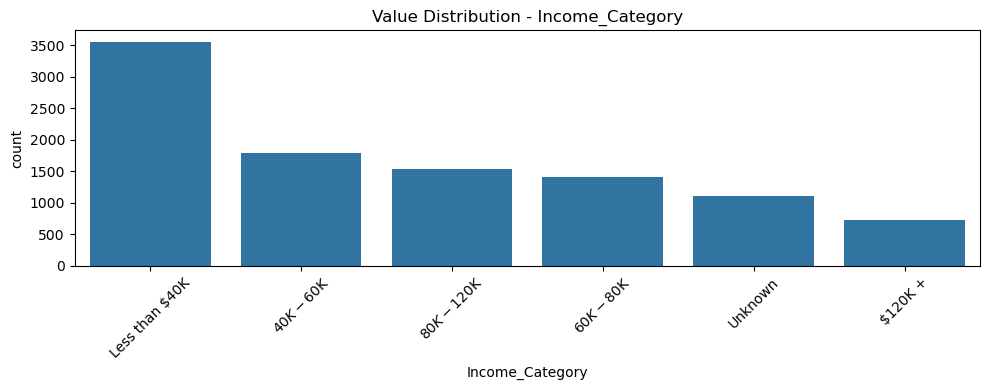


Column: Income_Category
Unique values: 6
Top values:
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Dữ liệu cân bằng



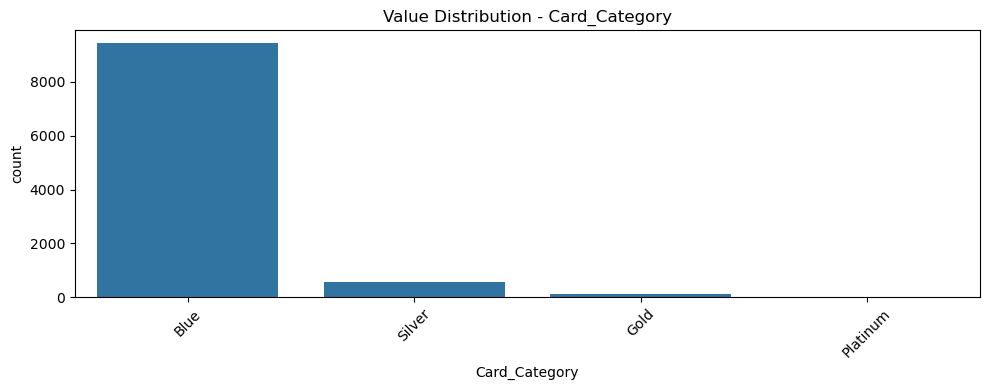


Column: Card_Category
Unique values: 4
Top values:
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
Dữ liệu không cân bằng



,column,unique_values,top_values
0,Attrition_Flag,2,"{'Existing Customer': 8500, 'Attrited Customer..."
1,Gender,2,"{'F': 5358, 'M': 4769}"
2,Education_Level,7,"{'Graduate': 3128, 'High School': 2013, 'Unkno..."
3,Marital_Status,4,"{'Married': 4687, 'Single': 3943, 'Unknown': 7..."
4,Income_Category,6,"{'Less than $40K': 3561, '$40K - $60K': 1790, ..."
5,Card_Category,4,"{'Blue': 9436, 'Silver': 555, 'Gold': 116, 'Pl..."


In [19]:
summary = []

for col in categorical_cols:
    s = df[col]

    # 1. Số lượng giá trị distinct
    unique_count = s.nunique()

    # 2. Top 10 giá trị frequent
    top_values = s.value_counts().head(10)

    summary.append({
        "column": col,
        "unique_values": unique_count,
        "top_values": top_values.to_dict()
    })

    # 3. Visualization
    plt.figure(figsize=(10, 4))
    sns.countplot(x=s, order=s.value_counts().index)
    plt.title(f"Value Distribution - {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"\nColumn: {col}")
    print(f"Unique values: {unique_count}")
    print(f"Top values:\n{top_values}")

    max_ratio = top_values.iloc[0] / len(s)
    if max_ratio > 0.6:
        print("Dữ liệu không cân bằng\n")
    else:
        print("Dữ liệu cân bằng\n")

pd.DataFrame(summary)


Nhìn nhanh vào các biến phân loại cho thấy khách hàng còn sử dụng thẻ (Existing) chiếm đa số (~84%), hạng thẻ Blue áp đảo nên cần cân nhắc kỹ khi trực quan hoặc xây dựng mô hình.

#### Data Quality

Ở đây hơi khác một chút so với numerical cols thì categorical cols có sự xuất hiện của missing values. Cụ thể ở các cột Educational_level, Marital_status, Income_Category có các giá trị "Unknown". Ta có thể xem đây là missing values.

##### Tỉ lệ missing values

In [20]:
for col in categorical_cols:
    missing = len(df[df[col] == "Unknown"])
    missing_pct = round(missing/len(df)*100,2)
    print(f"Column: {col}, Missing: {missing}, Missing %: {missing_pct}%")


Column: Attrition_Flag, Missing: 0, Missing %: 0.0%
Column: Gender, Missing: 0, Missing %: 0.0%
Column: Education_Level, Missing: 1519, Missing %: 15.0%
Column: Marital_Status, Missing: 749, Missing %: 7.4%
Column: Income_Category, Missing: 1112, Missing %: 10.98%
Column: Card_Category, Missing: 0, Missing %: 0.0%


##### Kiểm tra giá trị có bị inconsistencied không
Theo quan ở trên, các giá trị đều nhất quán, không có cái nào bị trùng về mặt ý nghĩa

##### Category quá ít quan sát

In [21]:
rare_threshold = 0.01
rare_categories = {}

for col in categorical_cols:
    freq = df[col].value_counts(normalize=True)
    rare = freq[freq < rare_threshold]
    if len(rare) > 0:
        rare_categories[col] = rare

for col, rare in rare_categories.items():
    print(f"\nColumn: {col}")
    print(rare)


Column: Card_Category
Card_Category
Platinum    0.001975
Name: proportion, dtype: float64


- Nhận xét: ta thấy trong cột Card_Category thì giá trị Platinum chiếm chưa đến 0.2%, quá ít. Giá trị này có thể xem xét gộp chung với giá trị khác

### Missing Data Analysis

Trước hết ta chuyển các giá trị "Unknown" về nan 

In [22]:
df.replace("Unknown", np.nan, inplace=True)

#### Overall Assessment

##### Missing values Summary

In [23]:
missing_summary = []
for col in df.columns:
    missing = df[col].isna().sum()
    missing_pct = round(missing/len(df)*100,2)
    missing_summary.append({
        'column': col,
        'missing': missing,
        'missing_pct': missing_pct
    })
missing_summary_df = pd.DataFrame(missing_summary)
missing_summary_df


,column,missing,missing_pct
0,Attrition_Flag,0,0.00
1,Customer_Age,0,0.00
2,Gender,0,0.00
3,Dependent_count,0,0.00
4,Education_Level,1519,15.00
5,Marital_Status,749,7.40
6,Income_Category,1112,10.98
7,Card_Category,0,0.00
8,Months_on_book,0,0.00
9,Total_Relationship_Count,0,0.00


- Ta có thể thấy, trong tổng số 20 cột dữ liệu, chỉ có 3 cột chứa giá trị thiếu (missing values) gồm Education_Level, Marital_Status và Income_Category. Các cột còn lại đều không có giá trị thiếu, cho thấy bộ dữ liệu tương đối sạch và đã được xử lý tốt ở bước tiền xử lý.

- Tuy nhiên, tỷ lệ missing values ở ba cột này là khá đáng kể, trong đó Education_Level có tỷ lệ cao nhất (15%), tiếp theo là Income_Category (10.98%) và Marital_Status (7.40%). Đây đều là các biến phân loại quan trọng, do đó cần lựa chọn phương pháp xử lý phù hợp.

##### Visualize missing data patterns

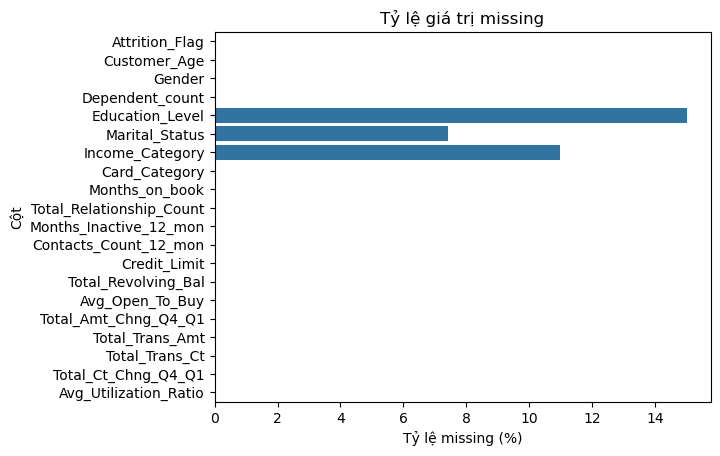

In [24]:
plt.figure()
sns.barplot(x='missing_pct', y='column', data=missing_summary_df)
plt.xlabel('Tỷ lệ missing (%)')
plt.ylabel('Cột')
plt.title('Tỷ lệ giá trị missing')
plt.show()


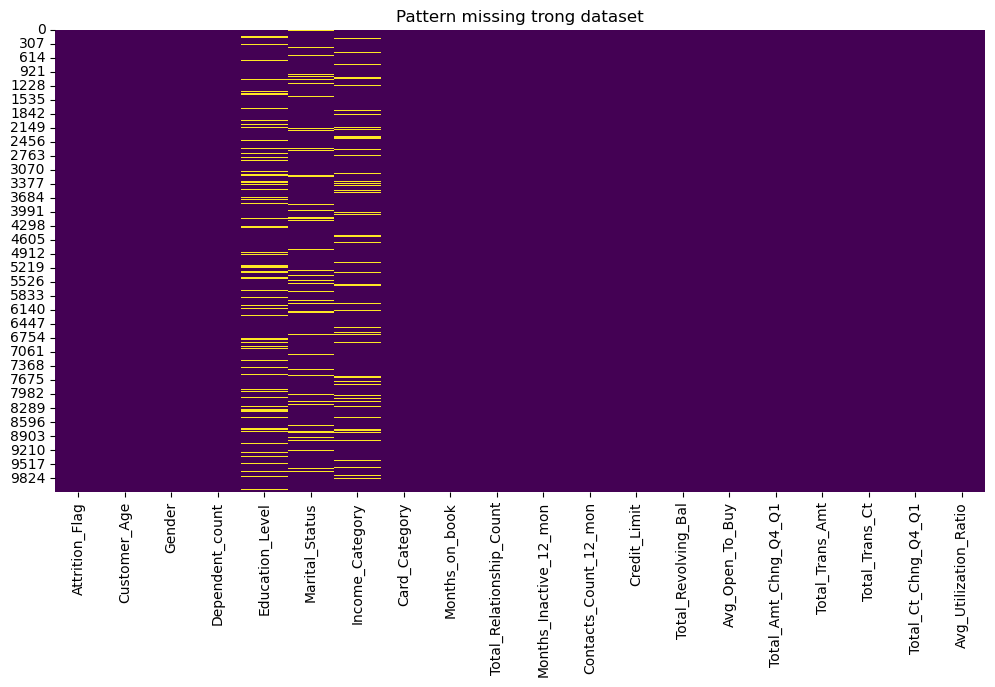

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Pattern missing trong dataset')
plt.show()

- Nhận xét: các missing values phân bố hoàn toàn ngẫu nhiên, không có pattern cụ thể

### Relationships & Correlations

#### Preliminary Patterns

##### Calculate correlation matrix for numerical variables

In [26]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr() 
print(corr_matrix.head())

                          Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000        -0.122254        0.788912   
Dependent_count              -0.122254         1.000000       -0.103062   
Months_on_book                0.788912        -0.103062        1.000000   
Total_Relationship_Count     -0.010931        -0.039076       -0.009203   
Months_Inactive_12_mon        0.054361        -0.010768        0.074164   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Customer_Age                             -0.010931                0.054361   
Dependent_count                          -0.039076               -0.010768   
Months_on_book                           -0.009203                0.074164   
Total_Relationship_Count                  1.000000               -0.003675   
Months_Inactive_12_mon                   -0.003675                1.000000   

                          Contacts_Count_12_mon  Credit_Limit  \
Customer_Age   

##### Correlation heatmap

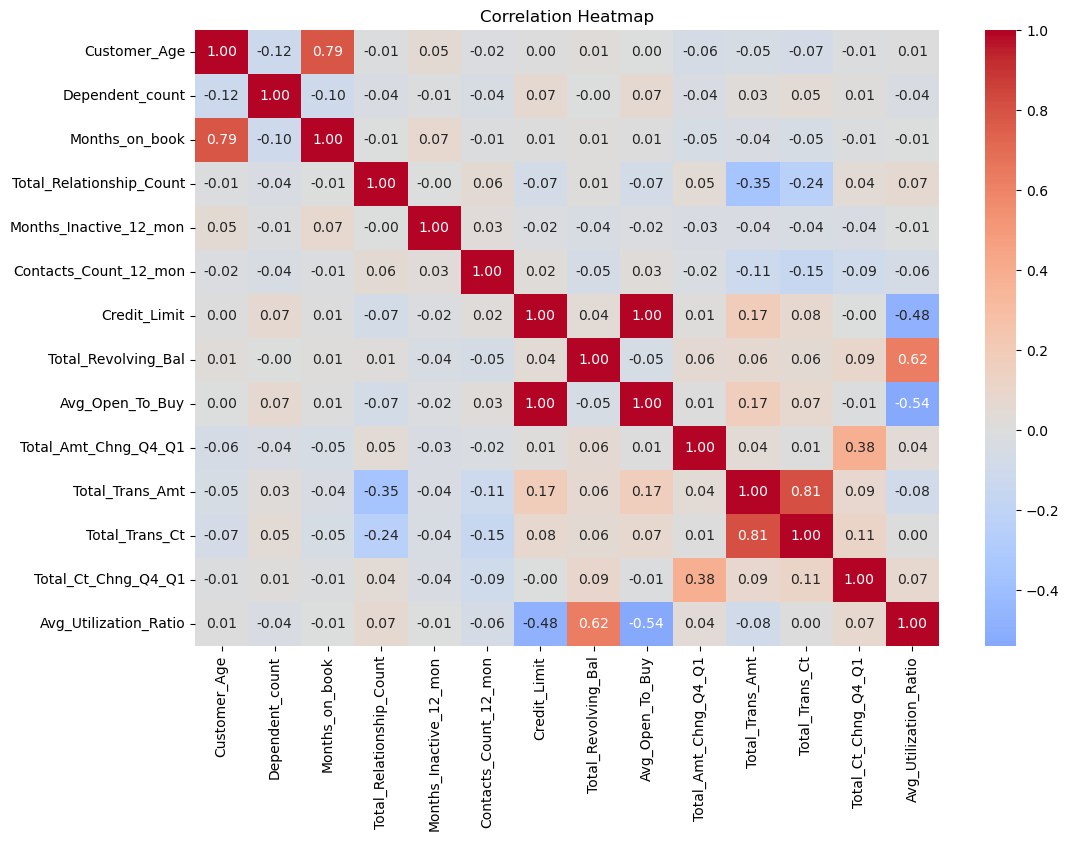

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

##### Identify strongly correlated pairs

In [28]:
strong_corrs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i,j]
        if abs(corr_value) >= 0.7:
            strong_corrs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))

strong_corrs_df = pd.DataFrame(strong_corrs, columns=['Column1', 'Column2', 'Correlation'])
print(strong_corrs_df)

           Column1          Column2  Correlation
0     Customer_Age   Months_on_book     0.788912
1     Credit_Limit  Avg_Open_To_Buy     0.995981
2  Total_Trans_Amt   Total_Trans_Ct     0.807192


Nhận xét: 
- Customer_Age vs Months_on_book: Không quá bất ngờ, vì tuổi tác thường liên quan đến độ trung thành hoặc thời gian sử dụng dịch vụ
- Credit_Limit vs Avg_Open_To_Buy: Đây là mối quan hệ công thức, không phải thực tế hành vi khách hàng
- Total_Trans_Amt vs Total_Trans_Ct: Hợp lý, nhưng cũng có thể cần kiểm tra giao dịch trung bình để xem có khách hàng nào chi tiêu lớn chỉ với ít giao dịch hay không.

#### Cross-tabulations

##### Categorical × categorical combinations

Ta sẽ kiểm định xem một điều hay được nói trong cuộc sống: 'Học càng cao, lương càng cao'

In [29]:
crosstab = pd.crosstab(df['Education_Level'], df['Income_Category'], margins=True, normalize='index')
crosstab

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K
Education_Level,,,,,
College,0.077348,0.202210,0.145856,0.193370,0.381215
Doctorate,0.097113,0.183727,0.154856,0.149606,0.414698
Graduate,0.072961,0.197783,0.150930,0.170959,0.407368
High School,0.082215,0.198546,0.171700,0.172260,0.375280
Post-Graduate,0.063966,0.236674,0.164179,0.172708,0.362473
Uneducated,0.091398,0.191244,0.149770,0.166667,0.400922
All,0.079440,0.199058,0.156001,0.172229,0.393273


- Ta có thấy một kết quả khá bất ngờ và phản trực giác so với suy nghĩ thông thường là "Học càng cao, lương càng cao".
    - Nhóm Doctorate (Tiến sĩ): Là nhóm có tỷ lệ thu nhập cao ($120K+) lớn nhất (9.7%). Tuy nhiên, họ cũng chính là nhóm có tỷ lệ thu nhập thấp (Less than $40K) cao nhất (41.5%). Điều này cho thấy sự phân hóa cực cao trong nhóm học vấn cao nhất.
    - Nhóm Uneducated (Không bằng cấp): Rất bất ngờ, đây là nhóm có tỷ lệ người thu nhập cao ($120K+) đứng thứ 2 (9.1%), chỉ thua nhóm Tiến sĩ một chút và cao hơn cả Cử nhân hay Thạc sĩ.
    - Nhóm Post-Graduate (Sau ĐH): Lại là nhóm có tỷ lệ người thu nhập cao ($120K+) thấp nhất bảng (6.4%), thấp hơn cả nhóm không có bằng cấp.
    
-> Cột Income_category và cột Education_Leval không phải là sự lựa chọn tốt, giữa chúng chưa thấy sự tỉ lệ nào ổn định cả

##### Numerical × categorical combinations

Ta kiểm tra thử liệu những khách hàng sắp bỏ đi thì sẽ có tổng giá trị giao dịch thấp hơn nhóm người ở lại không?

In [30]:
df.groupby('Attrition_Flag')['Total_Trans_Amt'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,3095.025814,2308.227629,510.0,1903.50,2329.0,2772.00,10583.0
Existing Customer,8500.0,4654.655882,3512.772635,816.0,2384.75,4100.0,4781.25,18484.0


- Dễ dàng thấy được sự chênh lệch rõ rệt: Khách hàng rời bỏ (Attrited Customer) có tổng số tiền giao dịch thấp hơn hẳn so với khách hàng hiện tại (Existing Customer). Trung bình nhóm Attrited chỉ tiêu khoảng 3,095, trong khi nhóm Existing là 4,654 (cao hơn ~50%).
- Phân phối: 75% số khách hàng rời bỏ có tổng giao dịch dưới 2,772, con số này chỉ nhỉnh hơn mức 25% thấp nhất của nhóm khách hàng hiện tại (2,384) một chút.

-> Cột 'Total_Trans_Amt' là một biến rất quan trọng để dự đoán việc khách hàng rời bỏ. Khách tiêu càng ít, nguy cơ rời bỏ càng cao.

Ta xem thử xu hướng thay đổi tổng số lần giao dịch Q4 so với Q1 có phải là dấu hiệu dự đoán khách hàng bỏ đi hay không?

In [31]:
df.groupby('Attrition_Flag')['Total_Ct_Chng_Q4_Q1'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,0.554386,0.226854,0.000,0.400,0.531,0.692,2.500
Existing Customer,8500.0,0.742434,0.228054,0.028,0.617,0.721,0.833,3.714



- Nhóm rời bỏ (Attrited) có chỉ số trung bình chỉ là 0.55. Tức là vào Q4 (cuối năm), họ chỉ quẹt thẻ bằng khoảng một nửa số lần so với Q1 (đầu năm).
- Nhóm ở lại (Existing) có chỉ số là 0.74. Họ cũng giảm tần suất, nhưng mức giảm nhẹ hơn nhiều.

-> Sự sụt giảm đột ngột về tần suất sử dụng (số lần quẹt thẻ) là một tín hiệu cho dự đoán khách hàng rời đi

### Initial Observations & Insights

##### Một số observation
Như vậy là quá trình EDA dữ liệu, ta đã có được một vài nhận xét, hiểu biết về dữ liệu, một số observation chính:
- Tổng quan:
    - Dữ liệu có hơn 10000 dòng, không có dòng nào trùng lặp hay bị empty
    - Dữ liệu đã được xử lý khá sạch, các giá trị Nan đã được xử lý về giá trị 'Unknown'.
    - Dữ liệu có 20 cột, 6 cột categorical, 14 cột numerical, các cột đều có dữ liệu thích hợp
- Các cột categorical:
    - Chứa các giá trị Nan đã được xử lý về giá trị 'Unknown'
    - Phân phối dữ liệu đang khá cân bằng, một số cột bị lệch phải
    - Một vài cột bị mất cân bằng nặng(Card_Category, Attrited_Flag) cần tiền xử lý nếu sử dụng mô hình
- Các cột numerical:
    - Không chứa giá trị Nan nào
    - Một số cột chứa Outliers nhưng không quá bất thường

##### Một số vấn đề về data quality
- Data đang bị mất cân bằng ở cột "Attrition"
- Data đang bị missing value tại các cột categorical: Education_Level, Marital_Status, Income_Category

##### Các bước tiền xử lý cần có

- Xử lý imbalance
- Xử lý missing values
- Xử lý Outliers